# Imports

In [1]:
import os.path as osp

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from gather_data import rational, loss

# Load data

Best loss is achieved when initial values are true values (except for Particle Swarm algorithm)

In [2]:
df_true = pd.read_csv(osp.join('..', 'data', 'task4_true.csv'))
df_approx_all = pd.read_csv(osp.join('..', 'data', 'task4.csv'), converters={"params": eval})
df_approx_all['capture_one'] = df_approx_all['loss'] < 150000
df_approx_all.sort_values('loss')

,method,approx_func,loss,init_params,params,iterations,try_num,true_init,capture_one
22,diff_ev,rational,958.074041,"[0, 1, -3, 2]","[-0.004579090646239368, 1.0093004915133517, -2...",87,5,True,True
20,nelder_mead,rational,958.904559,"[0, 1, -3, 2]","[0.00022677350147119095, 1.0020569940493163, -...",108,5,True,True
21,lm,rational,960.236914,"[0, 1, -3, 2]","[0.0, 1.0, -3.0, 2.0]",14,5,True,True
14,diff_ev,rational,134211.970877,"[-2.908550106853877, 0.7112176061220792, 2.231...","[-1.018532106119414, 1.018091927739774, -1.999...",63,3,False,True
8,nelder_mead,rational,134888.970531,"[-0.23644278605181857, 2.3967134376122416, 1.4...","[-1.1604085610422095, 1.1609502509007565, -2.0...",592,2,False,True
19,part_swarm,rational,137272.213357,"[-1.6597830870872672, -1.5131540200032259, -1....","[-0.7987300707205998, 0.3337353699773563, -1.4...",1000,4,False,True
11,part_swarm,rational,137577.085577,"[-0.23644278605181857, 2.3967134376122416, 1.4...","[-1.265487351214061, 1.4014155183455321, -2.10...",1000,2,False,True
23,part_swarm,rational,137943.375697,"[0, 1, -3, 2]","[-0.7768228115432062, 0.9005704436823352, -2.1...",1000,5,True,True
10,diff_ev,rational,142197.663952,"[-0.23644278605181857, 2.3967134376122416, 1.4...","[-1.4547058164239985, 1.455434212514316, -2.00...",55,2,False,True
3,part_swarm,rational,203823.576769,"[-3.7473108413948637, 3.4896979699495185, -3.5...","[-2.4199396840439205, 2.428712024073435, -2.00...",1000,0,False,False


Interesting, that all methods, while initialized with the same values, sometimes come to the close solutions, but not always.

In [3]:
df_approx_all.sort_values('try_num')

,method,approx_func,loss,init_params,params,iterations,try_num,true_init,capture_one
0,nelder_mead,rational,268399.901729,"[-3.7473108413948637, 3.4896979699495185, -3.5...","[37820.12913163667, -2801.3169360750744, -1060...",1001,0,False,False
1,lm,rational,268512.797146,"[-3.7473108413948637, 3.4896979699495185, -3.5...","[-0.0021299306902292673, 0.0028126552780285818...",6,0,False,False
2,diff_ev,rational,267570.863502,"[-3.7473108413948637, 3.4896979699495185, -3.5...","[-3.3971275171803015, 2.2862127013524685, -0.9...",73,0,False,False
3,part_swarm,rational,203823.576769,"[-3.7473108413948637, 3.4896979699495185, -3.5...","[-2.4199396840439205, 2.428712024073435, -2.00...",1000,0,False,False
4,nelder_mead,rational,268454.757844,"[-2.5053082391815, 3.8229735328744745, 0.56252...","[-0.5893629509650624, 0.883966424706164, -0.02...",404,1,False,False
5,lm,rational,277777.102905,"[-2.5053082391815, 3.8229735328744745, 0.56252...","[-8.661962772643859, 12.705353298364095, 21.68...",27,1,False,False
6,diff_ev,rational,267659.204269,"[-2.5053082391815, 3.8229735328744745, 0.56252...","[-2.9936307455556412, 1.875196320682619, -0.90...",76,1,False,False
7,part_swarm,rational,268713.216992,"[-2.5053082391815, 3.8229735328744745, 0.56252...","[-2.1911009640883634, 3.1874258757183584, 0.31...",1000,1,False,False
10,diff_ev,rational,142197.663952,"[-0.23644278605181857, 2.3967134376122416, 1.4...","[-1.4547058164239985, 1.455434212514316, -2.00...",55,2,False,True
11,part_swarm,rational,137577.085577,"[-0.23644278605181857, 2.3967134376122416, 1.4...","[-1.265487351214061, 1.4014155183455321, -2.10...",1000,2,False,True


In [4]:
pd.DataFrame(df_approx_all[~df_approx_all['true_init']].groupby('method').agg({'loss': np.mean, 'capture_one': np.sum})).sort_values('loss')

,loss,capture_one
method,,
part_swarm,196156.859777,2
diff_ev,215542.303081,2
nelder_mead,241713.341715,1
lm,272326.485032,0


In [5]:
df_approx = df_approx_all[~df_approx_all['true_init']].sort_values('loss').groupby('method').head(1)
df_approx

,method,approx_func,loss,init_params,params,iterations,try_num,true_init,capture_one
14,diff_ev,rational,134211.970877,"[-2.908550106853877, 0.7112176061220792, 2.231...","[-1.018532106119414, 1.018091927739774, -1.999...",63,3,False,True
8,nelder_mead,rational,134888.970531,"[-0.23644278605181857, 2.3967134376122416, 1.4...","[-1.1604085610422095, 1.1609502509007565, -2.0...",592,2,False,True
19,part_swarm,rational,137272.213357,"[-1.6597830870872672, -1.5131540200032259, -1....","[-0.7987300707205998, 0.3337353699773563, -1.4...",1000,4,False,True
9,lm,rational,267838.595247,"[-0.23644278605181857, 2.3967134376122416, 1.4...","[-3.9067253929133496, 2.2167511868284793, 0.63...",6,2,False,False


In [6]:
df_approx_true = df_approx_all[df_approx_all['true_init']]
df_approx_true

,method,approx_func,loss,init_params,params,iterations,try_num,true_init,capture_one
20,nelder_mead,rational,958.904559,"[0, 1, -3, 2]","[0.00022677350147119095, 1.0020569940493163, -...",108,5,True,True
21,lm,rational,960.236914,"[0, 1, -3, 2]","[0.0, 1.0, -3.0, 2.0]",14,5,True,True
22,diff_ev,rational,958.074041,"[0, 1, -3, 2]","[-0.004579090646239368, 1.0093004915133517, -2...",87,5,True,True
23,part_swarm,rational,137943.375697,"[0, 1, -3, 2]","[-0.7768228115432062, 0.9005704436823352, -2.1...",1000,5,True,True


# Plot data

In [7]:
plt.rcParams['figure.figsize'] = (10, 6)
METHODS = {'nelder_mead': 'Nelder-Mead',
           'lm': 'Levenberg-Marquardt',
           'diff_ev': 'Differential Evolution',
           'part_swarm': 'Particle Swarm'}

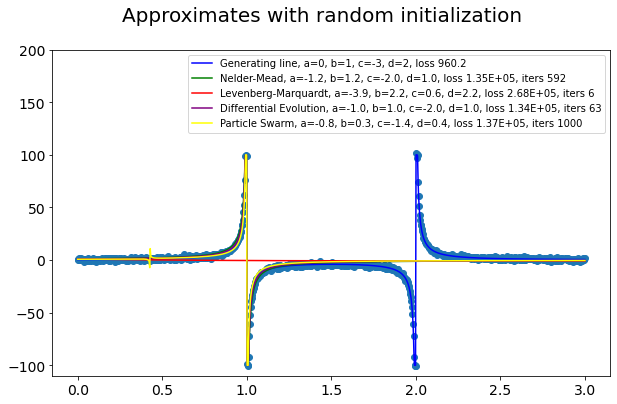

In [8]:
plt.scatter(df_true['X'], df_true['y'])
true_params = np.asarray([0, 1, -3, 2])
true_loss = loss(rational, df_true['X'], true_params, df_true['y'])
plt.plot(df_true['X'], df_true['y_clean'], c='blue', 
         label=f'Generating line, a={true_params[0]}, b={true_params[1]}, c={true_params[2]}, d={true_params[3]}, loss {true_loss:.1f}')
for method, color in zip(['nelder_mead', 'lm', 'diff_ev', 'part_swarm'],
                         ['green', 'red', 'purple', 'yellow']):
    row = df_approx[df_approx['method'] == method]
    loss_val = row['loss'].values[0]
    iters = row['iterations'].values[0]
    params = row['params'].values[0]
    approx_y = rational(df_true['X'], params)
    plt.plot(df_true['X'], approx_y, c=color, 
         label=f'{METHODS[method]}, a={params[0]:.1f}, b={params[1]:.1f}, c={params[2]:.1f}, d={params[3]:.1f}, loss {loss_val:.2E}, iters {iters}')

plt.ylim([-110, 200])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()
plt.suptitle('Approximates with random initialization', fontsize=20)
plt.legend();

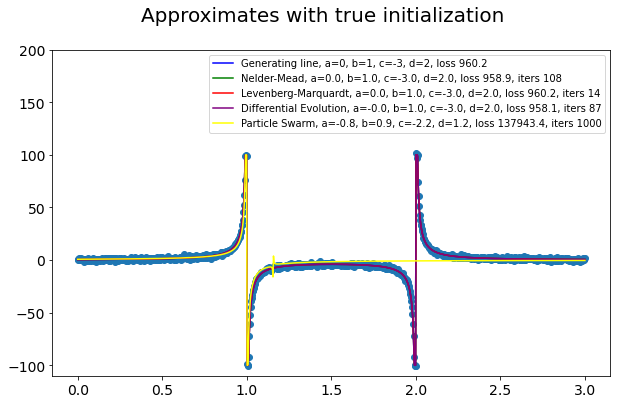

In [9]:
plt.scatter(df_true['X'], df_true['y'])
true_params = np.asarray([0, 1, -3, 2])
true_loss = loss(rational, df_true['X'], true_params, df_true['y'])
plt.plot(df_true['X'], df_true['y_clean'], c='blue', 
         label=f'Generating line, a={true_params[0]}, b={true_params[1]}, c={true_params[2]}, d={true_params[3]}, loss {true_loss:.1f}')
for method, color in zip(['nelder_mead', 'lm', 'diff_ev', 'part_swarm'],
                         ['green', 'red', 'purple', 'yellow']):
    row = df_approx_true[df_approx_true['method'] == method]
    loss_val = row['loss'].values[0]
    iters = row['iterations'].values[0]
    params = row['params'].values[0]
    approx_y = rational(df_true['X'], params)
    plt.plot(df_true['X'], approx_y, c=color, 
         label=f'{METHODS[method]}, a={params[0]:.1f}, b={params[1]:.1f}, c={params[2]:.1f}, d={params[3]:.1f}, loss {loss_val:.1f}, iters {iters}')

plt.ylim([-110, 200])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()
plt.suptitle('Approximates with true initialization', fontsize=20)
plt.legend();